In [1]:
import torch
import pandas as pd
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth", 1000)

In [89]:
!pip install matplotlib --quiet

In [2]:
ls assignment4/outputs/

gradescope_test_outputs.txt  test_outputs.txt


In [3]:
source_en = open("assignment4/en_es_data/test.en", "r")
pred_en = open("assignment4/outputs/test_outputs.txt", "r")
samples = []
for src, prd in zip(source_en, pred_en):
    record = {}
    record["src"] = src.split()
    record["prd"] = prd.split()
    samples.append(record)
    
df = pd.DataFrame(samples)

In [4]:
df.head()

,src,prd
0,"[You, know,, what, I, do, is, write, for, children,, and, I'm, probably, America's, most, widely, read, children's, author,, in, fact.]","[You, know, what, I, do, is, to, write, for, kids,, and, in, fact,, I, am, probably, the, author, for, kids,, you, read, in, the, U.S.]"
1,"[And, I, always, tell, people, that, I, don't, want, to, show, up, looking, like, a, scientist.]","[And, I, always, tell, the, people, I, don't, want, to, look, like, a, scientist.]"
2,"[You, can, have, me, as, a, farmer,, or, in, leathers,, and, no, one, has, ever, chose, farmer.]","[I, can, tell, you, as, a, farmer,, or, with, <unk>, and, never, nobody, has, chosen, a, farmer.]"
3,"[I'm, here, today, to, talk, to, you, about, circles, and, epiphanies.]","[I'm, here, to, talk, about, circles, and, <unk>]"
4,"[And, you, know,, an, epiphany, is, usually, something, you, find, that, you, dropped, someplace.]","[And, you, know, that, an, epiphany, is, generally, something, that, came, to, you, somewhere.]"


In [5]:
df["sentence_bleu"] = df.apply(lambda row: sentence_bleu([row["src"]], row["prd"]), axis=1)

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

In [6]:
df["en_length"] = df["src"].apply(lambda x: len(x))
df["bleu_bkt"] = pd.cut(df.sentence_bleu, bins=10, labels=[0,1,2,3,4,5,6,7,8,9])

In [7]:
df[df["bleu_bkt"]==6].sort_values(by="sentence_bleu", ascending=True).sample(10)

,src,prd,sentence_bleu,en_length,bleu_bkt
385,"[And, really, you, do, the, same, thing.]","[And, actually,, you, do, the, same, thing.]",0.643459,7,6
399,"[And, I've, never, seen, them.]","[And, I've, never, seen, it.]",0.668740,5,6
4437,"[And, this, information, is, stored, for, at, least, six, months, in, Europe,, up, to, two, years.]","[And, this, information, is, stored, at, least, six, months, in, Europe,, and, to, two, years.]",0.616036,16,6
110,"[In, many, cases,, people, are, actually, perfectly, healthy.]","[In, many, cases,, people, are, perfectly, healthy.]",0.612975,8,6
1052,"[KF:, That's, a, great, question.]","[<unk>, That's, a, great, question.]",0.668740,5,6
6507,"[On, that, final, handshake,, he, looked, at, me,, and, he, said,, ""Kevin,, I'm, sorry,, but, I, have, to, go.""]","[On, the, end,, he, looked, at, me,, and, he, said,, <unk>, I'm, sorry,, but, I, have, to, go.""]",0.629477,19,6
3530,"[I, had, my, first, apartment,, my, first, little, green, American, Express, card,, and, I, had, a, very, big, secret.]","[I, had, my, first, apartment,, my, first, <unk>, green, <unk>, and, I, had, a, very, big, secret.]",0.629941,19,6
6900,"[For, example,, here, we, see, it, successfully, playing, a, game, of, pong, against, itself,, illustrating, its, potential, for, gaming.]","[For, example,, here, we, see, it, successfully, playing, a, game, of, <unk>, against, itself,, <unk>, its, potential, for, play.]",0.650339,19,6
1206,"[Here, you, see, a, sample, of, this, actual, attack, code.]","[Here, you, see, a, sample, of, this, code, code.]",0.671688,10,6
3164,"[When, I, was, little,, I, thought, my, country, was, the, best, on, the, planet.]","[When, I, was, a, little,, I, thought, my, country, was, the, best, on, Earth.]",0.699752,14,6


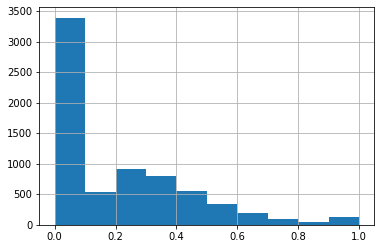

In [8]:
df.sentence_bleu.hist()

In [118]:
df.groupby("bleu_bkt")[["sentence_bleu","en_length"]].mean()

,sentence_bleu,en_length
bleu_bkt,,
0,0.000501,11.889708
1,0.161897,27.398887
2,0.250776,22.311475
3,0.349501,21.027431
4,0.444358,18.236794
5,0.543959,15.836310
6,0.645271,13.333333
7,0.739945,12.968421
8,0.838678,11.185185


In [117]:
df.corr()

,sentence_bleu,en_length
sentence_bleu,1.000000,0.127854
en_length,0.127854,1.000000


In [10]:
r1 = "love can always find a way".split()
r2 = "love makes anything possible".split()
c1 = "the love can always do".split()
c2 = "love can make anything possible".split()

In [11]:
sentence_bleu([r1,r2], c1, weights=(0.5,0.5,0,0))

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0.5477225575051662

In [12]:
sentence_bleu([r1,r2], c2, weights=(0.5,0.5,0,0))

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0.6324555320336759

In [130]:
import math
math.exp(0.5*math.log(3/5) + 0.5*math.log(0.5))

0.5477225575051662

I think c2 is better translation than c1. I agree with BLEU score here

In [13]:
sentence_bleu([r1], c1, weights=(0.5,0.5,0,0)) , sentence_bleu([r1], c2, weights=(0.5,0.5,0,0))

(0.448437301984003, 0.25890539701513365)

Do not agree with the above BLEU score recommendation for better translation